# Covid19 Data Analysis Notebook


## Let's Import the modules¶


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

print('Modules are imported.')

Modules are imported.


## Task 2
### Task 2.1: importing covid19 dataset

importing "covid19_Confirmed_dataset.csv" from "./Datasets" folder.

In [2]:
corona_confirmed_data = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
corona_confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#check shape of the data
corona_confirmed_data.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [4]:
corona_confirmed_data.drop(['Lat', 'Long'], axis=1,  inplace=True)

In [5]:
corona_confirmed_data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the Country

In [6]:
corona_data_aggregated = corona_confirmed_data.groupby('Country/Region').sum()
corona_data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
corona_data_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data
visualization always helps for better understanding of our data.

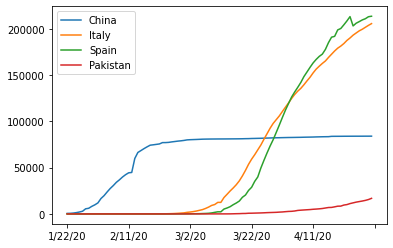

In [8]:
corona_data_aggregated.loc['China'].plot()
corona_data_aggregated.loc['Italy'].plot()
corona_data_aggregated.loc['Spain'].plot()
corona_data_aggregated.loc['Pakistan'].plot()
plt.legend()

## Task3: Calculating a good measure
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

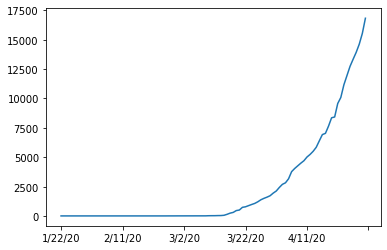

In [9]:
corona_data_aggregated.loc['Pakistan'].plot()

### task 3.1: caculating the first derivative of the curve¶

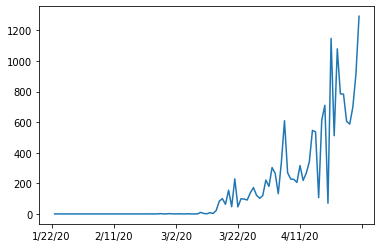

In [10]:
corona_data_aggregated.loc['Pakistan'].diff().plot()

### task 3.2: find maxmimum infection rate

In [11]:
print(f"Maximum Number of cases in Pakistan in a Single day are {corona_data_aggregated.loc['Pakistan'].diff().max()}")

Maximum Number of cases in Pakistan in a Single day are 1292.0


### Task 3.3: find maximum infection rate for all of the countries.

In [12]:
counturies = list(corona_data_aggregated.index)
max_infection_rates = []

for c in counturies:
    max_infection_rates.append(corona_data_aggregated.loc[c].diff().max())

In [13]:
corona_data_aggregated['max infection rate'] = max_infection_rates
corona_data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column

In [14]:
corona_data = pd.DataFrame(corona_data_aggregated['max infection rate'])

In [15]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Task4:
- Importing the world_happiness_report_2019.csv dataset
- Selecting needed columns for our analysis
- Join the datasets
- Calculate the correlations as the result of our analysis

### Task 4.1: Import dataset

In [16]:
world_happiness_report = pd.read_csv('Datasets/world_happiness_report_2019.csv')
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
world_happiness_report.shape

(156, 9)

### Task 4.2: let's drop the useless columns

In [18]:
cols_to_drop = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
world_happiness_report.drop(cols_to_drop, axis=1, inplace=True)
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [19]:
world_happiness_report.set_index(['Country or region'], inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared¶
Corona Dataset :

In [22]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


#### wolrd happiness report Dataset:

In [21]:
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [23]:
data = world_happiness_report.join(corona_data).copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


## Task 4.5: correlation matrix

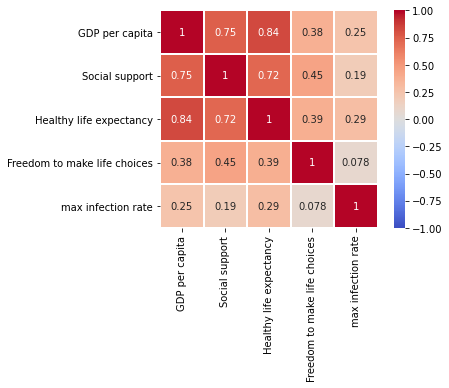

In [34]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
           linewidths=1, linecolor='white', square=True)

## Visualizations

In [35]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


### Task 5.1: Plotting each feature vs maximum Infection rate

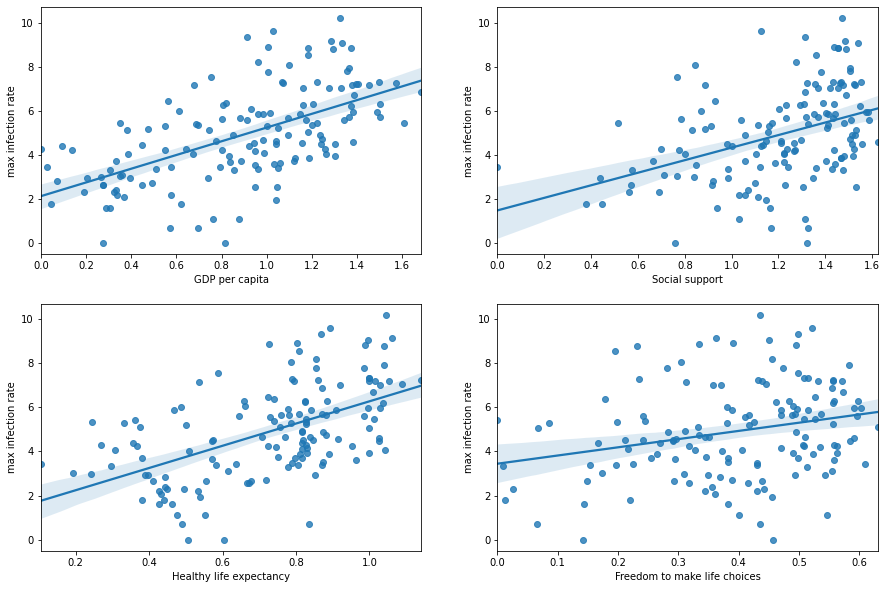

In [47]:
gdp = data['GDP per capita']
social_support = data ['Social support']
healthy_life_expectancy = data ['Healthy life expectancy']
freedom_of_choices = data ['Freedom to make life choices']

y = data['max infection rate']
y = np.log(y)

plt.figure(figsize=[15,10])
plt.subplot(221)
sns.regplot(gdp,y)
plt.subplot(222)
sns.regplot(social_support, y)
plt.subplot(223)
sns.regplot(healthy_life_expectancy, y)
plt.subplot(224)
sns.regplot(freedom_of_choices, y)

plt.show()